# RD Method

description to be added

## Initialize

In [62]:
import sys, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
BASE_PATH = '../# TestModel'

INPUT_FILE_PATH = f'{BASE_PATH}/input.csv'
OUTPUT_FILE_PATH = f'{BASE_PATH}/output.csv'

## Read Input

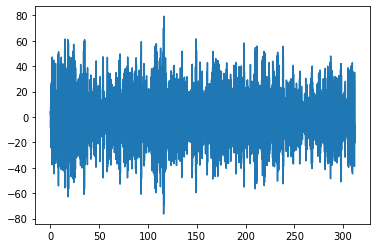

In [64]:
df = pd.read_csv(INPUT_FILE_PATH, sep=',', encoding="SHIFT-JIS")
inputHistory = np.array(df)
inputT = inputHistory[:,0]
inputV = inputHistory[:,1]
plt.plot(inputT,inputV)


## Calc RD Technique

In [65]:
def CalcRD(resultStepLength:int, maxOverlayCount:int=sys.maxsize, skippingInitialPeakCount:int=0):

  """
  
  resultStepLength
  
  maxOverlayCount (=inf)
  
  skippingInitialPeakCount (=0)
  
  """

  resultV = np.zeros(resultStepLength)
  peakCount = 0
  overlayCount = 0

  # Add to resultV if peak found
  for i in range(1, len(inputV) - resultStepLength - 1):

    if (maxOverlayCount <= overlayCount):
      print("Successfully stopped: overlayCount count reached maxOverlayCount")
      break

    lastStep = inputV[i - 1]
    currentStep = inputV[i]
    nextStep = inputV[i + 1]

    # Simple peak detection
    if (lastStep < currentStep and currentStep >= nextStep):
      
      peakCount += 1

      # Skip when in skipping state 
      if (skippingInitialPeakCount >= peakCount):
        continue

      # Overlay
      overlayCount += 1
      resultV = np.add(resultV, inputV[i : i + resultStepLength])


  # Print result
  if (skippingInitialPeakCount > 0):
    print(f"Skipped  : {peakCount - overlayCount} / {skippingInitialPeakCount}")

  if (maxOverlayCount == sys.maxsize):
    print(f"Overlayed: {overlayCount}")
  else:
    print(f"Overlayed: {overlayCount} / {maxOverlayCount}")

  return resultV

In [66]:
resultV = CalcRD(200)
# resultV = CalcRD(300, 1000, 0)

Overlayed: 1190


<AxesSubplot:xlabel='t'>

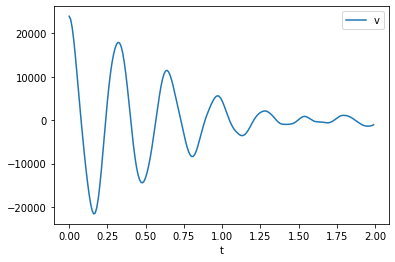

In [67]:
df = pd.DataFrame(zip(inputT,resultV), columns =["t", "v"])
df.to_csv(OUTPUT_FILE_PATH, index=None)
df.plot(x="t", y=["v"])

## Calc Attenuation Constant

In [68]:
def CalcAttenutation(checkAttenutationCount:int):
  """
  
  checkPeakCount
  
  """
  peaks = []
  attenuations = []

  def AddPeak(t, v):
    print(f"Peak {len(peaks)}: t={t:.2f}, v={v:.2f}")
    peaks.append(v)

  AddPeak(inputT[0], resultV[0])

  # find peaks
  for i in range(1, len(resultV)-1):

    if (checkAttenutationCount < len(peaks)):
      break

    lastStep = resultV[i - 1]
    currentStep = resultV[i]
    nextStep = resultV[i + 1]

    # Simple peak detection
    if (lastStep < currentStep and currentStep >= nextStep):
      AddPeak(inputT[i], currentStep)


  # Calc attenuations
  print()


  initialPeak = peaks[0]

  for i in range(1, len(peaks)):
    currentPeak = peaks[i]
    delta = 1 / i * math.log(initialPeak / currentPeak)
    attenuation = delta / 2 / math.pi 
    print(f"Attenuation {i}: h={attenuation:.4f}")
    attenuations.append(attenuation)

In [69]:
CalcAttenutation(4)

Peak 0: t=0.00, v=23921.22
Peak 1: t=0.32, v=17915.87
Peak 2: t=0.64, v=11463.31
Peak 3: t=0.97, v=5621.27
Peak 4: t=1.28, v=2127.74

Attenuation 1: h=0.0460
Attenuation 2: h=0.0585
Attenuation 3: h=0.0768
Attenuation 4: h=0.0963


## Done